# CNN
## Image recognition and proprocessing

In [2]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#load the mnist dataset
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

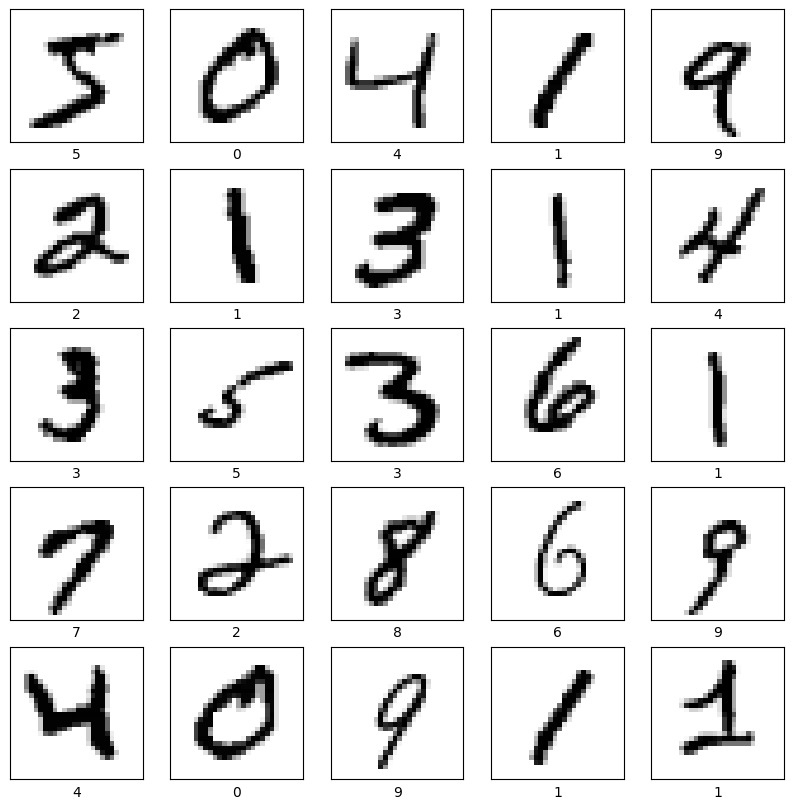

In [20]:
#display some samples images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [25]:
#explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set")
print(f"The size of the images is {X_train[0].shape}")

We have 60000 images in the training set and 10000 images in the test set
The size of the images is (28, 28)


In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


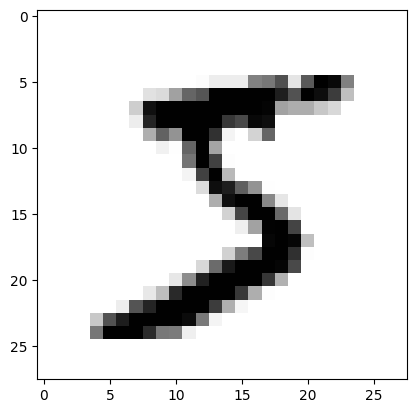

In [28]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

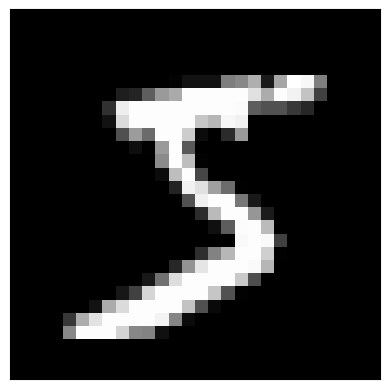

In [34]:
plt.imshow(X_train[0],cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [38]:
# Display the values of each pixel in the image
print("Pixel Values:")

for row in X_train[0]:          # Loop through each row of the image
    for pixel in row:           # Loop through each pixel in that row
        print("{:3}".format(pixel), end=' ')   # Print pixel value with spacing
    print()                     # Newline after finishing a row


Pixel Values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [39]:
#also need to change the dtype to float32
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [40]:
# Display the values of each pixel in the image
print("Pixel Values:")

for row in X_train[0]:          # Loop through each row of the image
    for pixel in row:           # Loop through each pixel in that row
        print("{:3}".format(pixel), end=' ')   # Print pixel value with spacing
    print()                     # Newline after finishing a row


Pixel Values:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0117647061124444 0.07058823853731155 0.07058823853731155 0.07058823853731155 0.4941176474094391 0.5333333611488342 0.686274528503418 0.10196078568696976 0.6509804129600525 1.0 0.9686274528503418 0.49803921580314636 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.11764705926179886 0.1411764770746231 0.3686274588108063 0.6039215922355652 0.6666666865348816 0.992156863

In [41]:
#reshape the image to have a channel dimension
x_train = X_train.reshape(X_train.shape[0],28,28,1)
x_test = X_test.reshape(X_test.shape[0],28,28,1)

<Figure size 640x480 with 0 Axes>

<Axes: >

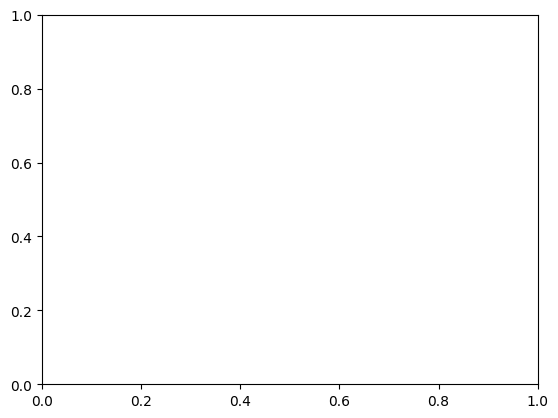

In [42]:
#display the complete output of the cell
display(plt.gcf())
display(plt.gca())

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

In [46]:
#create an input layer
input_layer =tf.keras.layers.Input(shape=(28,28,1))

# CNN model building

In [54]:
model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                  

In [56]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
              )

In [57]:
#train the model
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 40s 51ms/step - loss: 0.3724 - accuracy: 0.8833 - val_loss: 0.1431 - val_accuracy: 0.9557
Epoch 2/5
750/750 [==============================] - 37s 50ms/step - loss: 0.1150 - accuracy: 0.9652 - val_loss: 0.0942 - val_accuracy: 0.9707
Epoch 3/5
750/750 [==============================] - 37s 50ms/step - loss: 0.0846 - accuracy: 0.9736 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 4/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0692 - accuracy: 0.9782 - val_loss: 0.0730 - val_accuracy: 0.9783
Epoch 5/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0578 - accuracy: 0.9816 - val_loss: 0.0625 - val_accuracy: 0.9822


In [59]:
#evaluate the model
test_loss,test_accuracy =model.evaluate(X_test,y_test)
print("Test loss:",test_loss)
print("Test Accuracy:",test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.0505 - accuracy: 0.9849
Test loss: 0.05045134201645851
Test Accuracy: 0.9848999977111816


In [60]:
#saved the model 
model.save('models_saved/model.h5')

(28, 28)
(28, 28, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

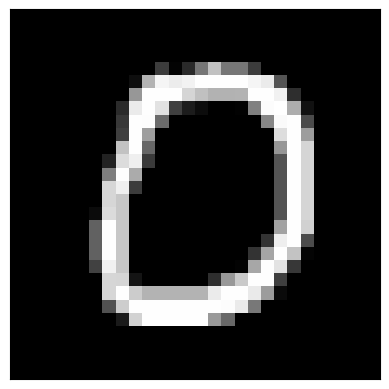

In [108]:
#grab image
img = X_test[10]
print(img.shape)
#reshape the image(28,28,1)
img = img.reshape((28,28,1))
print(img.shape)

plt.imshow(img,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show

In [ ]:
#predict the image
prediction = model.predict(img.reshape(1,28,28,1))
print(prediction[:,7])

1/1 [==============================] - 0s 48ms/step
[0.09372698]


In [112]:
print(f"The model predicts that this image is {prediction.argmax()}")

The model predicts that this image is 5


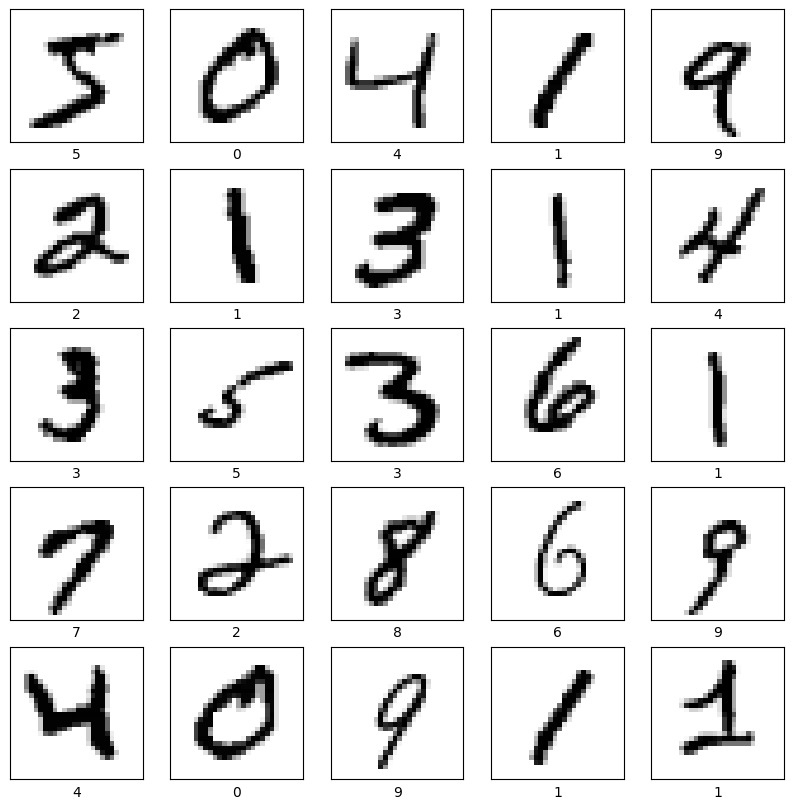

We have 60000 images in the training set and 10000 images in the test set
The size of the images is (28, 28)


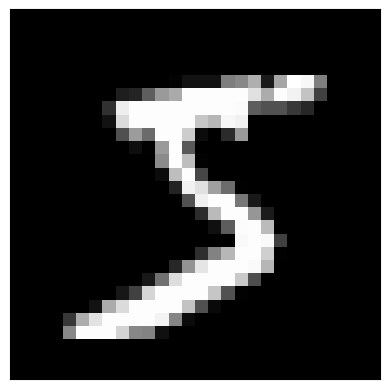

Pixel Values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

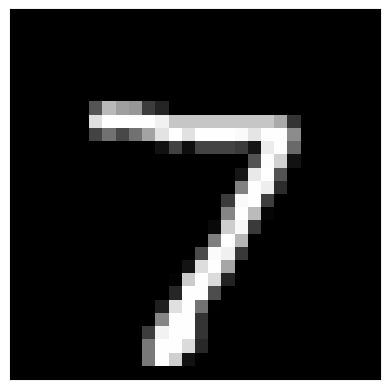

In [114]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#load the mnist dataset
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

#display some samples images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set")
print(f"The size of the images is {X_train[0].shape}")

plt.imshow(X_train[0],cmap=plt.cm.binary)

plt.imshow(X_train[0],cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel Values:")

for row in X_train[0]:          # Loop through each row of the image
    for pixel in row:           # Loop through each pixel in that row
        print("{:3}".format(pixel), end=' ')   # Print pixel value with spacing
    print()                     # Newline after finishing a row
    
#also need to change the dtype to float32
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

# Display the values of each pixel in the image
print("Pixel Values:")

for row in X_train[0]:          # Loop through each row of the image
    for pixel in row:           # Loop through each pixel in that row
        print("{:3}".format(pixel), end=' ')   # Print pixel value with spacing
    print()                     # Newline after finishing a row

#reshape the image to have a channel dimension
x_train = X_train.reshape(X_train.shape[0],28,28,1)
x_test = X_test.reshape(X_test.shape[0],28,28,1)

#create an input layer
input_layer =tf.keras.layers.Input(shape=(28,28,1))

model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(10,activation='softmax')])

model.summary()

#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
              )

#train the model
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

#evaluate the model
test_loss,test_accuracy =model.evaluate(X_test,y_test)
print("Test loss:",test_loss)
print("Test Accuracy:",test_accuracy)

#grab image
img = X_test[0]
print(img.shape)
#reshape the image(28,28,1)
img = img.reshape((28,28,1))
print(img.shape)

plt.imshow(img,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show

#predict the image
prediction = model.predict(img.reshape(1,28,28,1))
print(prediction[:,7])

print(f"The model predicts that this image is {prediction.argmax()}")